This is described by an equation of the form
$$
\frac1{t^2} \frac{d}{dt}\left(t^2 \frac{d\theta}{dt}\right) + \theta^n = 0
$$

In [1]:
from integrators import contact as ic
from integrators.common import rk4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LaneEmden:
    def __init__(self, n):
        self.n = n

    def f(self, t):
        return 2/t
    
    def V(self, q, t):
        return q**(self.n+1)/(self.n+1)
    
    def Vq(self, q, t):
        return q**self.n

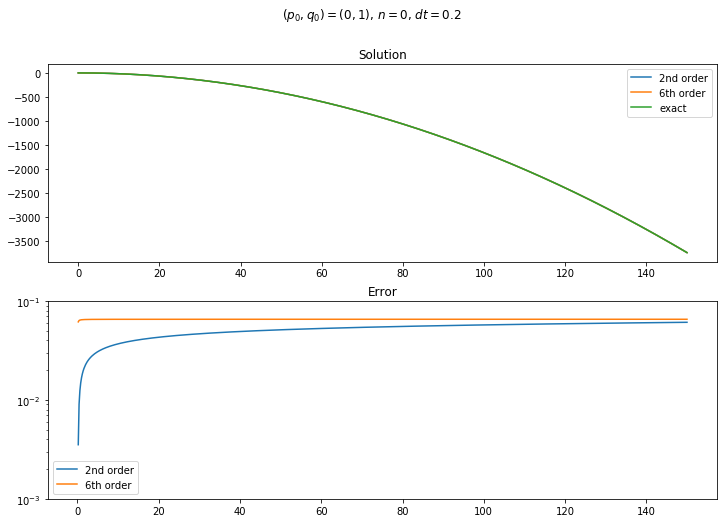

In [10]:
le = LaneEmden(0)
dt = 0.2
tf = 150
steps = int(np.floor(tf/dt))

tspan = np.linspace(0.0, tf, num=steps)

p0, q0 = (0,1)
exact = lambda t: 1-1/6*t**2

plt.figure(figsize=(12,8))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")

sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)
solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

# step6e = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.e_six)
# step6b = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.b_six)
# step6c = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.c_six)
# sole, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)
# solb, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)
# solc, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)

# solrk = rk4(le, (p0, q0), tspan)
# solsc, _, _ = ic.integrate(ic.variational_step, le, tspan, p0, q0, 0.0)

plt.subplot(211)
plt.title("Solution")
plt.plot(tspan, 
         sol[:,1],
         label="2nd order")
plt.plot(tspan,
         solm[:,1],
         label="6th order")
# plt.plot(tspan,
#          sole[:,1],
#          label="6th order exact")
# plt.plot(tspan,
#          solb[:,1],
#          label="6th order b")
# plt.plot(tspan,
#          solc[:,1],
#          label="6th order c")


#     plt.plot(tspan,
#              solsc[:,1],
#              label="V")
plt.plot(tspan, exact(tspan),
         label="exact")
plt.legend()

plt.subplot(212)
plt.title("Error")
plt.plot(tspan[1:], 
         abs(sol[:,1]-exact(tspan))[1:],
         label="2nd order")
plt.plot(tspan[1:],
         abs(solm[:,1]-exact(tspan))[1:],
         label="6th order")
# plt.plot(tspan[1:],
#          abs(sole[:,1]-exact(tspan))[1:],
#          label="6th order exact")
# plt.plot(tspan[1:],
#          abs(solb[:,1]-exact(tspan))[1:],
#          label="6th order b")
# plt.plot(tspan[1:],
#          abs(solc[:,1]-exact(tspan))[1:],
#          label="6th order c")
#     plt.plot(tspan,
#              solsc[:,1]-exact(tspan),
#              label="V")
plt.yscale("log")
plt.ylim(1e-3, 1e-1)
plt.legend()
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


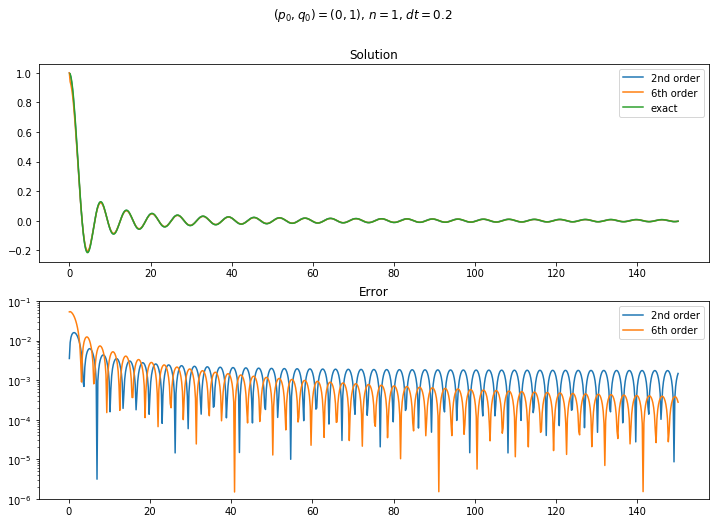

In [8]:
le = LaneEmden(1)
dt = 0.2
tf = 150
steps = int(np.floor(tf/dt))

tspan = np.linspace(0.0, tf, num=steps)

p0, q0 = (0,1)
exact = lambda t: np.sin(t)/t

plt.figure(figsize=(12,8))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")

sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)
solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

# step6e = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.e_six)
# step6b = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.b_six)
# step6c = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.c_six)
# sole, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)
# solb, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)
# solc, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)

# solrk = rk4(le, (p0, q0), tspan)
# solsc, _, _ = ic.integrate(ic.variational_step, le, tspan, p0, q0, 0.0)

plt.subplot(211)
plt.title("Solution")
plt.plot(tspan, 
         sol[:,1],
         label="2nd order")
plt.plot(tspan,
         solm[:,1],
         label="6th order")
# plt.plot(tspan,
#          sole[:,1],
#          label="6th order exact")
# plt.plot(tspan,
#          solb[:,1],
#          label="6th order b")
# plt.plot(tspan,
#          solc[:,1],
#          label="6th order c")


#     plt.plot(tspan,
#              solsc[:,1],
#              label="V")
plt.plot(tspan, exact(tspan),
         label="exact")
plt.legend()

plt.subplot(212)
plt.title("Error")
plt.plot(tspan[1:], 
         abs(sol[:,1]-exact(tspan))[1:],
         label="2nd order")
plt.plot(tspan[1:],
         abs(solm[:,1]-exact(tspan))[1:],
         label="6th order")
# plt.plot(tspan[1:],
#          abs(sole[:,1]-exact(tspan))[1:],
#          label="6th order exact")
# plt.plot(tspan[1:],
#          abs(solb[:,1]-exact(tspan))[1:],
#          label="6th order b")
# plt.plot(tspan[1:],
#          abs(solc[:,1]-exact(tspan))[1:],
#          label="6th order c")
#     plt.plot(tspan,
#              solsc[:,1]-exact(tspan),
#              label="V")
plt.yscale("log")
plt.ylim(1e-6, 1e-1)
plt.legend()
plt.show()


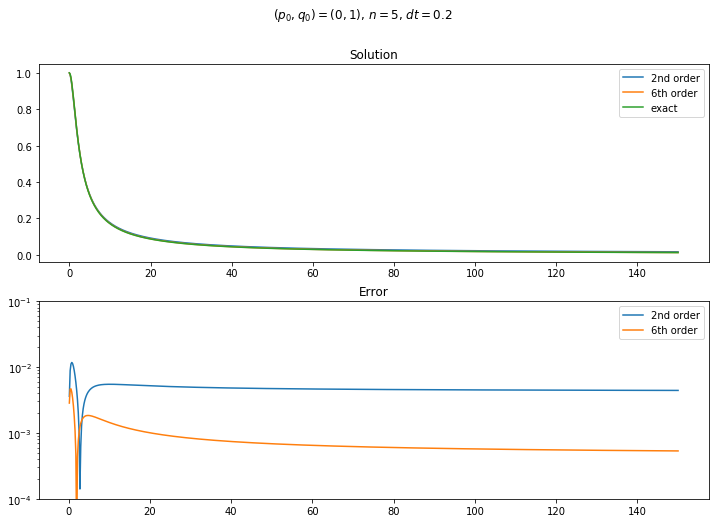

In [7]:
le = LaneEmden(5)
dt = 0.2
tf = 150
steps = int(np.floor(tf/dt))

tspan = np.linspace(0.0, tf, num=steps)

p0, q0 = (0,1)
exact = lambda t: 1/np.sqrt(1 + t**2/3)

plt.figure(figsize=(12,8))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")

sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)
solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

# step6e = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.e_six)
# step6b = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.b_six)
# step6c = lambda system, dt, p, q, s, t: ic.step6(system, dt, p, q, s, t, a=ic.c_six)
# sole, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)
# solb, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)
# solc, _, _ = ic.integrate(step6e, le, tspan, p0, q0, 0.0)

# solrk = rk4(le, (p0, q0), tspan)
# solsc, _, _ = ic.integrate(ic.variational_step, le, tspan, p0, q0, 0.0)

plt.subplot(211)
plt.title("Solution")
plt.plot(tspan, 
         sol[:,1],
         label="2nd order")
plt.plot(tspan,
         solm[:,1],
         label="6th order")
# plt.plot(tspan,
#          sole[:,1],
#          label="6th order exact")
# plt.plot(tspan,
#          solb[:,1],
#          label="6th order b")
# plt.plot(tspan,
#          solc[:,1],
#          label="6th order c")


#     plt.plot(tspan,
#              solsc[:,1],
#              label="V")
plt.plot(tspan, exact(tspan),
         label="exact")
plt.legend()

plt.subplot(212)
plt.title("Error")
plt.plot(tspan[1:], 
         abs(sol[:,1]-exact(tspan))[1:],
         label="2nd order")
plt.plot(tspan[1:],
         abs(solm[:,1]-exact(tspan))[1:],
         label="6th order")
# plt.plot(tspan[1:],
#          abs(sole[:,1]-exact(tspan))[1:],
#          label="6th order exact")
# plt.plot(tspan[1:],
#          abs(solb[:,1]-exact(tspan))[1:],
#          label="6th order b")
# plt.plot(tspan[1:],
#          abs(solc[:,1]-exact(tspan))[1:],
#          label="6th order c")
#     plt.plot(tspan,
#              solsc[:,1]-exact(tspan),
#              label="V")
plt.yscale("log")
plt.ylim(1e-4, 1e-1)
plt.legend()
plt.show()
